In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron

In [2]:
def is_np_array(a):
    return type(a) is np.ndarray

def dot(a, b):
    assert(is_np_array(a))
    assert(is_np_array(b))
    assert(a.shape == b.shape)
    return np.sum(a*b)

def sign(a):
    return 1 if a >= 0 else -1

def feature_vector(w, b):
    return np.append(w,b)

def input_vector(xi):
    return np.append(xi,1)

def w_dot_xi(w,xi,b):
    return dot(feature_vector(w,b),input_vector(xi))
    
def h(w, xi, b):
    return sign(w_dot_xi(w, xi, b))

def is_xi_classified_correctly(yi, w, xi, b):
    assert (yi == -1 or yi == 1)
    return yi * w_dot_xi(w, xi, b) > 0

## Dataset

In [3]:
class Dataset:
    def __init__(self, x_data, y_data):
        self.x = x_data
        self.y = y_data

def get_rand_sign():
    return 1 if np.random.rand() >= 0.5 else -1

def generate_random_dataset(num_features, data_size):
    w_ans = np.random.rand(num_features)
    b = np.random.rand() * 10 * get_rand_sign()
    x = np.zeros((data_size, num_features))
    y = np.zeros(data_size)
    for i in range(data_size):
        sign = -1 if i < data_size/2 else 1
        threshold = -b/w_ans
        if sign > 0:
            x[i] = threshold + np.random.rand(num_features) * 10
        else:
            x[i] = threshold - np.random.rand(num_features) * 10
        y[i] = h(w_ans, x[i], b)
        
        assert(is_xi_classified_correctly(yi=y[i], w=w_ans, xi=x[i], b=b))
    return Dataset(x_data=x, y_data=y)

def shuffle_dataset(dataset):
    assert(dataset.x.shape[0] == dataset.y.shape[0])
    data = np.append(dataset.x, dataset.y.reshape(dataset.y.shape[0],1), axis=1)
    assert(data.shape == (dataset.x.shape[0], dataset.x.shape[1] + 1))
    np.random.shuffle(data)
    return Dataset(x_data=data[:,:-1], y_data=data[:,-1])

def split_train_test(split, x, y):
    assert(x.shape[0] == y.shape[0])
    l = int(x.shape[0] * split)
    x_train, y_train, x_test, y_test = x[:l], y[:l], x[l:], y[l:]
    assert(x_train.shape[0] == y_train.shape[0])
    assert(x_test.shape[0] == y_test.shape[0])
    return Dataset(x_data=x_train, y_data=y_train), Dataset(x_data=x_test, y_data=y_test)

In [4]:
num_features = 1
dataset_size = 150
dataset = generate_random_dataset(num_features, dataset_size)
dataset = shuffle_dataset(dataset)
train_dataset, test_dataset = split_train_test(0.7, dataset.x, dataset.y)
train_dataset.x, train_dataset.y, test_dataset.x, test_dataset.y

(array([[-31.45068297],
        [-32.8297393 ],
        [-18.13971974],
        [-26.74349819],
        [-27.67561851],
        [-16.70312427],
        [-33.28402319],
        [-26.80044297],
        [-17.84066775],
        [-17.93222076],
        [-33.13345936],
        [-29.94154368],
        [-29.9477989 ],
        [-34.10483191],
        [-20.06501338],
        [-20.27752508],
        [-18.47556014],
        [-29.67029615],
        [-24.50232919],
        [-32.09168389],
        [-20.98958505],
        [-25.68661987],
        [-19.77543711],
        [-31.43445966],
        [-31.44632879],
        [-31.72589787],
        [-18.21070442],
        [-16.45880829],
        [-16.34272003],
        [-22.89722373],
        [-31.28585067],
        [-21.79976183],
        [-33.56951489],
        [-21.84301572],
        [-19.18946833],
        [-28.62163081],
        [-21.46975992],
        [-21.22891797],
        [-28.68830122],
        [-16.70919725],
        [-19.20330633],
        [-22.530

## Algorithm

In [5]:
class TrainedWeights:
    def __init__(self, w, b):
        self.W = w
        self.B = b
    
def train(X,Y):
    W = np.zeros(num_features)
    B = 0
    while True:
        m = 0
        for i in range(X.shape[0]):
            xi = X[i]
            yi = Y[i]
            if not is_xi_classified_correctly(yi=yi,xi=xi,w=W,b=B):
                w = feature_vector(W,B)
                x = input_vector(xi)
                w = w + yi * x
                W = w[:-1]
                B = w[-1]
                m = m + 1
        if m == 0:
            break
        print(f"m={m}")
    return TrainedWeights(w=W, b=B)
        
def count_incorrect(X,Y,W,B):
    count = 0
    for i in range(X.shape[0]):
        xi = X[i]
        yi = Y[i]
        if not is_xi_classified_correctly(yi=yi,xi=xi,w=W,b=B):
            count += 1
    return count
        
trainedWeights = train(train_dataset.x, train_dataset.y)
num_incorrect_after_training = count_incorrect(train_dataset.x, train_dataset.y, trainedWeights.W, trainedWeights.B)
assert(num_incorrect_after_training == 0)

m=35
m=33
m=31
m=31
m=31
m=31
m=31
m=24
m=11
m=34
m=27
m=34
m=28
m=34
m=31
m=31
m=31
m=31
m=31
m=31
m=24
m=15
m=31
m=21
m=31
m=31
m=31
m=23
m=30
m=26
m=30
m=18
m=7


## Visualization of Training Data

In [6]:
def plot_line(trainedWeights, dataset):
    w = trainedWeights.W
    b = trainedWeights.B
    r = max(abs(dataset.x))
    x = np.arange(-r, r)
#     y = -w[0]/w[1] * x - b
#     y = np.zeros(x.shape[0])
#     for i,xi in enumerate(range(y.shape[0])):
#         y[i] = w_dot_xi(w,xi,b)
    y = w[0] * x + b
    plt.plot(x,y)
def plot_data(data_x, data_y):
    x_pos = data_x[data_y > 0]
    y_pos = data_y[data_y > 0]
    x_neg = data_x[data_y < 0]
    y_neg = data_y[data_y < 0]
    plt.scatter(x_pos[:,0], np.ones(x_pos.shape[0]), c='coral')
    plt.scatter(x_neg[:,0], np.ones(x_neg.shape[0]), c='lightblue')

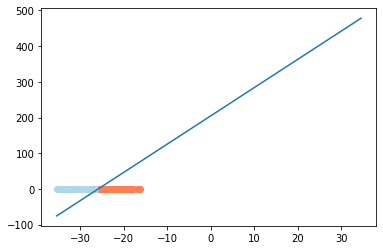

In [7]:
plot_data(train_dataset.x, train_dataset.y)
plot_line(trainedWeights, train_dataset)

## Visualization of Test Data

In [12]:
def test(test_data, W, B):
    incorrect = 0
    for i,xi in enumerate(test_data.x):
        yi_true = test_data.y[i]
        if not is_xi_classified_correctly(yi_true, W, xi, B):
            incorrect += 1
    return incorrect

In [13]:
test(test_dataset, trainedWeights.W, trainedWeights.B)

1

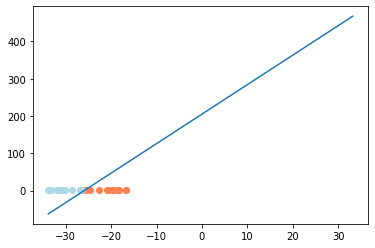

In [14]:
plot_data(test_dataset.x, test_dataset.y)
plot_line(trainedWeights, test_dataset)